In [175]:
import numpy as np

In [283]:
class ScratchLinearRegression:
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : of the following form. ndarray, shape (n_features,)
      Parameters
    self.loss : of the following form. ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : of the following form. ndarray, shape (self.iter,)
      Record loss on validation data

    self.theta : 
    """
    def __init__(self, num_iter, no_bias, lr=1e-3, verbose=False):
        self.num_iter = num_iter
        self.no_bias = no_bias
        self.lr = lr
        self.verbose = verbose

        #attributes
        #self.coef_ = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])
        self.theta = np.array([])

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : of the following form. ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : of the following form. ndarray, shape (n_samples, )
            Correct value of verification data
        """

        if self.no_bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])

        self.theta = np.zeros(X.shape[1]).reshape((-1, 1))
        for i in range(self.num_iter):
            self.gradient_descent(X, y)  
            pred =  self._linear_hypothesis(X)
                
            mse = self.MSE(pred, y)
            self.loss = np.append(self.loss, mse)
            if self.verbose:
                #Output learning process when verbose is set to True
                print(f"At {i} iteration learning mse {mse}")
        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            of the following form. ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        if self.no_bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])
        pred = self._linear_hypothesis(X)

        pred = pred.ravel()
        return pred


    def _linear_hypothesis(self, x):
        """
        Compute a linear hypothetical function

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
        Training data

        Returns
        -------
        of the following form. ndarray, shape (n_samples, 1)
        Estimated result by linear hypothetical function

        """
        return x @ self.theta
    
    def gradient_descent(self, x, y):
        """
        Compute the hypothetical values of the linear function

        Parameters
        ------
        x: Features for model training
        y: Target variable

        Returns
        ------
        None
        """
        rows = x.shape[0]
        columns = x.shape[1]
        pred = self._linear_hypothesis(x)

        for column in range(columns):
            gradient = np.array([])
            for row in range(rows):
                a = (pred[row] - y[row]) * x[row, column]
                gradient = np.append(gradient, a)
            gradient = gradient.sum()
            self.theta[column] = self.theta[column] - ((self.lr * gradient)/rows)
    
    def MSE(self, y_pred, y):
        """
        Calculation of mean square error

        Parameters
        ----------
        y_pred : of the following form. ndarray, shape (n_samples,)
        Estimated value
        y : of the following form. ndarray, shape (n_samples,)
        Correct answer value

        Returns
        ----------
        mse : numpy.float
        Mean squared error
        """
        error = (y_pred - y)**2
        mse = np.average(error)
        return mse
    
    
                
                
    


    


In [284]:
model = ScratchLinearRegression(5000, True)

In [227]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [285]:
model.fit(x_train, y_train)

In [288]:
pred = model.predict(x_test)


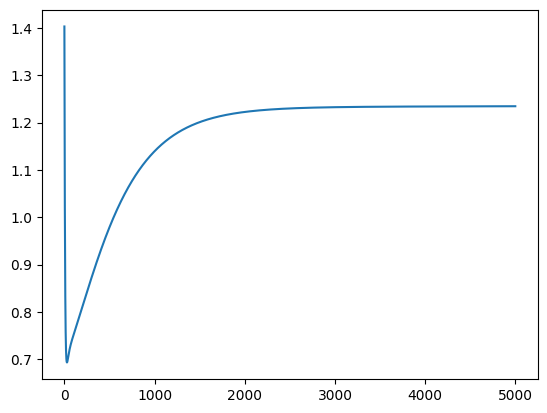

In [286]:
from matplotlib import pyplot as plt
plt.plot(model.loss)

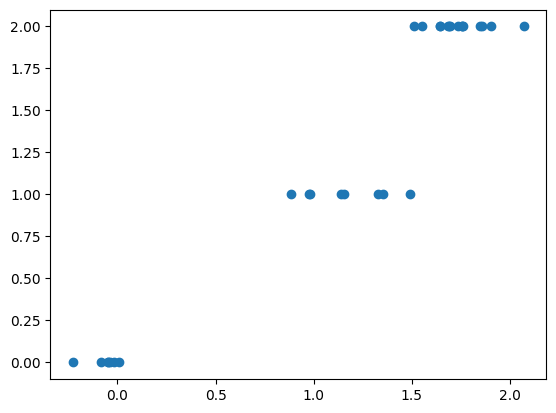

In [289]:
plt.scatter(pred, y_test)

In [290]:
model.MSE(pred, y_test)


0.06275254660807959

In [291]:
model.theta

array([[-0.02989333],
       [-0.04838418],
       [-0.09404732],
       [ 0.34290115],
       [ 0.2427807 ]])